Found 168 validated image filenames belonging to 7 classes.
Found 45 validated image filenames belonging to 7 classes.
Epoch 1/100
17/17 [==============================] - 6s 317ms/step - loss: 3.0034 - accuracy: 0.1548 - val_loss: 2.0429 - val_accuracy: 0.1333 - lr: 1.0000e-04
Epoch 2/100
17/17 [==============================] - 5s 296ms/step - loss: 2.7125 - accuracy: 0.2917 - val_loss: 2.0464 - val_accuracy: 0.1333 - lr: 1.0000e-04
Epoch 3/100
17/17 [==============================] - 5s 315ms/step - loss: 2.1082 - accuracy: 0.3214 - val_loss: 1.9879 - val_accuracy: 0.1556 - lr: 1.0000e-04
Epoch 4/100
17/17 [==============================] - 5s 321ms/step - loss: 2.2245 - accuracy: 0.3095 - val_loss: 1.9947 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 5/100
17/17 [==============================] - 5s 320ms/step - loss: 2.2390 - accuracy: 0.3214 - val_loss: 2.0395 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 6/100
17/17 [==============================] - ETA: 0s - loss: 2.0168 - acc

Epoch 47/100
17/17 [==============================] - 6s 380ms/step - loss: 1.0808 - accuracy: 0.6012 - val_loss: 0.8508 - val_accuracy: 0.7556 - lr: 3.2000e-08
Epoch 48/100
17/17 [==============================] - 6s 378ms/step - loss: 1.1060 - accuracy: 0.6250 - val_loss: 0.8495 - val_accuracy: 0.7556 - lr: 3.2000e-08
Epoch 49/100
17/17 [==============================] - ETA: 0s - loss: 0.9513 - accuracy: 0.6845
Epoch 49: ReduceLROnPlateau reducing learning rate to 6.399999818995639e-09.
17/17 [==============================] - 6s 382ms/step - loss: 0.9513 - accuracy: 0.6845 - val_loss: 0.8520 - val_accuracy: 0.7778 - lr: 3.2000e-08
Epoch 50/100
17/17 [==============================] - 6s 376ms/step - loss: 0.9814 - accuracy: 0.6548 - val_loss: 0.8535 - val_accuracy: 0.7778 - lr: 6.4000e-09
{'loss': [3.0034382343292236, 2.7124578952789307, 2.108196973800659, 2.224492073059082, 2.2390174865722656, 2.016834020614624, 1.7637217044830322, 1.6731221675872803, 1.6839121580123901, 1.4524056

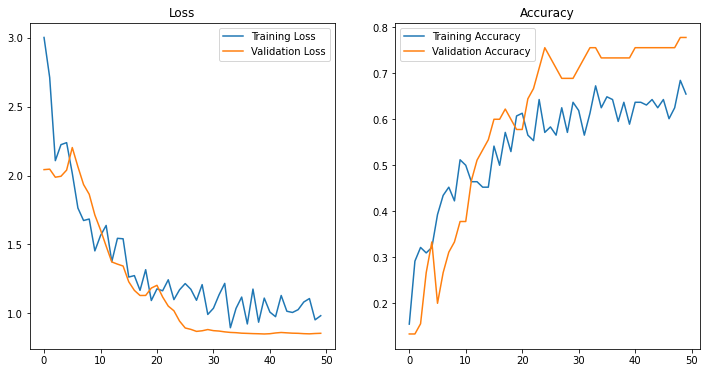

4/4 [==============================] - 1s 234ms/step - loss: 0.8766 - accuracy: 0.7250
Validation loss: 0.876640796661377
Validation accuracy: 0.7250000238418579
5/5 [==============================] - 1s 195ms/step
Confusion Matrix
[[0 1 2 0 0 2 1]
 [1 0 2 2 0 0 1]
 [2 0 1 1 1 1 1]
 [1 0 1 0 1 3 1]
 [0 1 1 2 0 1 1]
 [1 1 1 2 1 0 1]
 [0 0 1 1 2 1 1]]
Classification Report
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         6
     disgust       0.00      0.00      0.00         6
        fear       0.11      0.14      0.12         7
       happy       0.00      0.00      0.00         7
     neutral       0.00      0.00      0.00         6
     sadness       0.00      0.00      0.00         7
    surprise       0.14      0.17      0.15         6

    accuracy                           0.04        45
   macro avg       0.04      0.04      0.04        45
weighted avg       0.04      0.04      0.04        45



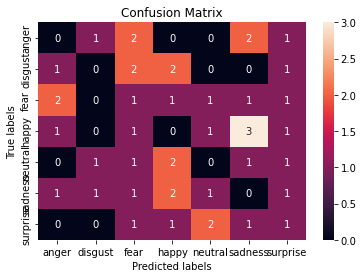

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Collecting paths and targets
def collect_paths_and_targets(folder):
    paths = []
    targets = []
    for root, _, filenames in os.walk(folder):
        for filename in filenames:
            if filename.endswith(('jpg', 'png', 'jpeg', 'tiff')):
                full_path = os.path.join(root, filename)
                image_target_class = full_path.split(os.sep)[-2]
                paths.append(full_path)
                targets.append(image_target_class)
    return paths, targets


train_folder = "jaffe/train"
val_folder = "jaffe/validation"

train_paths, train_targets = collect_paths_and_targets(train_folder)
val_paths, val_targets = collect_paths_and_targets(val_folder)

# Creating DataFrame
df_train = pd.DataFrame(data={'path': train_paths, 'target': train_targets})
df_val = pd.DataFrame(data={'path': val_paths, 'target': val_targets})

# Data Generators with Augmentation
target_size = (124, 124)
input_image_size = (124, 124, 3)
batch_size = 10
# Data Generators with Augmentation
target_size = (124, 124)
input_image_size = (124, 124, 3)
batch_size = 10

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_dataframe(
    df_train,
    target_size=target_size,
    x_col='path',
    y_col='target',
    seed=42,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_iterator = val_datagen.flow_from_dataframe(
    df_val,
    target_size=target_size,
    x_col='path',
    y_col='target',
    seed=42,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
# Model using VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_image_size)

for layer in base_model.layers[:-4]:  # Unfreeze the top layers for fine-tuning
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout rate
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout rate
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_vgg19_best.h5", monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
epochs = 100

history = model.fit(train_iterator,
                    validation_data=val_iterator,
                    epochs=epochs,
                    callbacks=[checkpoint, reduce_lr, early_stopping])

# Print training history
print(history.history)

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Evaluating the model on validation data
val_loss, val_accuracy = model.evaluate(val_iterator, steps=val_iterator.samples // val_iterator.batch_size, verbose=1)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Predicting on validation data
preds_on_val_data = model.predict(val_iterator)
max_pred_on_val_data = np.argmax(preds_on_val_data, axis=1)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(val_iterator.classes, max_pred_on_val_data)
print('Confusion Matrix')
print(conf_matrix)

target_names = list(val_iterator.class_indices.keys())
print('Classification Report')
print(classification_report(val_iterator.classes, max_pred_on_val_data, target_names=target_names))

# Heatmap of Confusion Matrix
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
plt.show()


Found 168 validated image filenames belonging to 7 classes.
Found 45 validated image filenames belonging to 7 classes.
Epoch 1/100
17/17 [==============================] - 20s 1s/step - loss: 2.8935 - accuracy: 0.2262 - val_loss: 2.2413 - val_accuracy: 0.1333 - lr: 1.0000e-04
Epoch 2/100
17/17 [==============================] - 22s 1s/step - loss: 2.1991 - accuracy: 0.3512 - val_loss: 2.0129 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 3/100
17/17 [==============================] - 23s 1s/step - loss: 1.9910 - accuracy: 0.3750 - val_loss: 2.0871 - val_accuracy: 0.2444 - lr: 1.0000e-04
Epoch 4/100
17/17 [==============================] - 23s 1s/step - loss: 1.7036 - accuracy: 0.4464 - val_loss: 2.0524 - val_accuracy: 0.3556 - lr: 1.0000e-04
Epoch 5/100
17/17 [==============================] - ETA: 0s - loss: 1.5308 - accuracy: 0.4524
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
17/17 [==============================] - 22s 1s/step - loss: 1.5308 - accurac

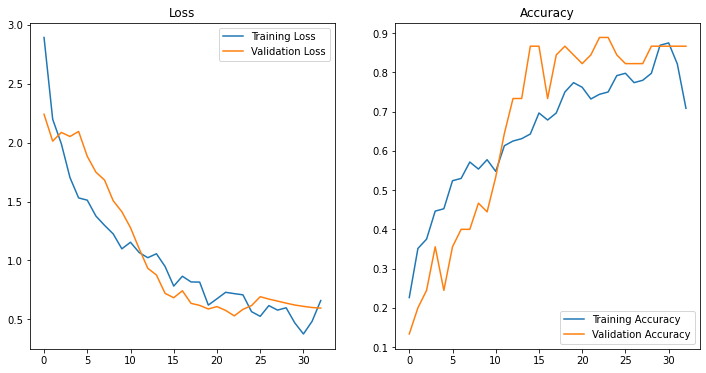

4/4 [==============================] - 4s 880ms/step - loss: 0.5164 - accuracy: 0.9000
Validation loss: 0.5164229869842529
Validation accuracy: 0.8999999761581421
5/5 [==============================] - 4s 767ms/step
Confusion Matrix
[[2 0 4 0 0 0 0]
 [2 0 0 1 0 2 1]
 [1 1 0 0 3 2 0]
 [2 0 1 2 1 1 0]
 [1 0 2 1 1 0 1]
 [1 1 0 2 1 0 2]
 [0 1 0 1 1 1 2]]
Classification Report
              precision    recall  f1-score   support

       anger       0.22      0.33      0.27         6
     disgust       0.00      0.00      0.00         6
        fear       0.00      0.00      0.00         7
       happy       0.29      0.29      0.29         7
     neutral       0.14      0.17      0.15         6
     sadness       0.00      0.00      0.00         7
    surprise       0.33      0.33      0.33         6

    accuracy                           0.16        45
   macro avg       0.14      0.16      0.15        45
weighted avg       0.14      0.16      0.14        45



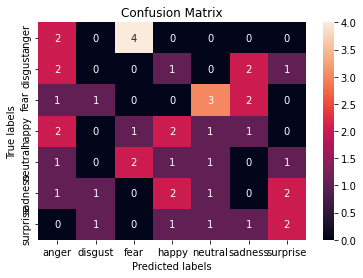

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Collecting paths and targets
def collect_paths_and_targets(folder):
    paths = []
    targets = []
    for root, _, filenames in os.walk(folder):
        for filename in filenames:
            if filename.endswith(('jpg', 'png', 'jpeg', 'tiff')):
                full_path = os.path.join(root, filename)
                image_target_class = full_path.split(os.sep)[-2]
                paths.append(full_path)
                targets.append(image_target_class)
    return paths, targets


train_folder = "jaffe/train"
val_folder = "jaffe/validation"

train_paths, train_targets = collect_paths_and_targets(train_folder)
val_paths, val_targets = collect_paths_and_targets(val_folder)

# Creating DataFrame
df_train = pd.DataFrame(data={'path': train_paths, 'target': train_targets})
df_val = pd.DataFrame(data={'path': val_paths, 'target': val_targets})

# Data Generators with Augmentation
target_size = (256, 256)
input_image_size = (256, 256, 3)
batch_size = 10

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_dataframe(
    df_train,
    target_size=target_size,
    x_col='path',
    y_col='target',
    seed=42,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_iterator = val_datagen.flow_from_dataframe(
    df_val,
    target_size=target_size,
    x_col='path',
    y_col='target',
    seed=42,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
# Model using VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_image_size)

for layer in base_model.layers[:-4]:  # Unfreeze the top layers for fine-tuning
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout rate
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Increased dropout rate
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_vgg19_best.h5", monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
epochs = 100

history = model.fit(train_iterator,
                    validation_data=val_iterator,
                    epochs=epochs,
                    callbacks=[checkpoint, reduce_lr, early_stopping])

# Print training history
print(history.history)

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Evaluating the model on validation data
val_loss, val_accuracy = model.evaluate(val_iterator, steps=val_iterator.samples // val_iterator.batch_size, verbose=1)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Predicting on validation data
preds_on_val_data = model.predict(val_iterator)
max_pred_on_val_data = np.argmax(preds_on_val_data, axis=1)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(val_iterator.classes, max_pred_on_val_data)
print('Confusion Matrix')
print(conf_matrix)

target_names = list(val_iterator.class_indices.keys())
print('Classification Report')
print(classification_report(val_iterator.classes, max_pred_on_val_data, target_names=target_names))

# Heatmap of Confusion Matrix
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
plt.show()
